In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-04-10 15:19:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
connected. to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... 
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  55.2MB/s    in 2.8s    

2025-04-10 15:19:29 (55.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


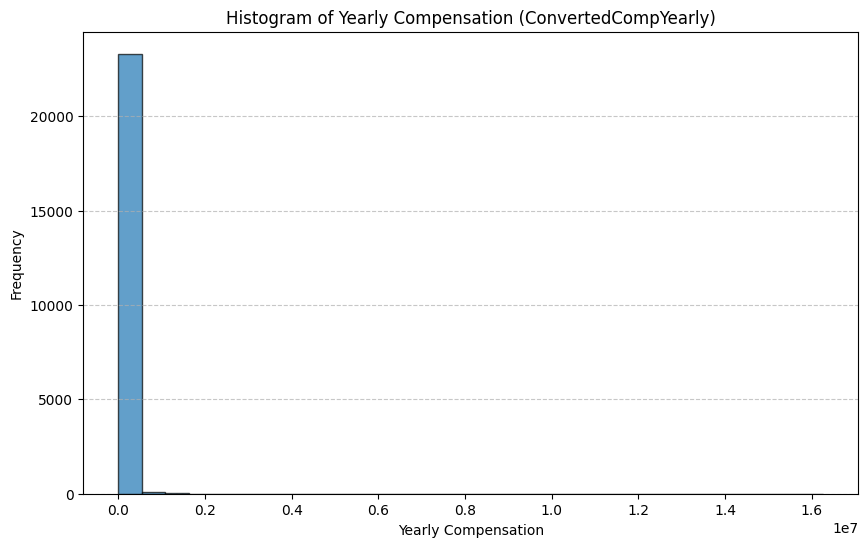

In [4]:
#1.1. Histogram of ConvertedCompYearly
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")
df.dropna(subset=["ConvertedCompYearly"], inplace=True)
plt.figure(figsize=(10, 6))
plt.hist(df["ConvertedCompYearly"], bins=30, color="#1f77b4", alpha=0.7, edgecolor="black")
plt.xlabel("Yearly Compensation")
plt.ylabel("Frequency")
plt.title("Histogram of Yearly Compensation (ConvertedCompYearly)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

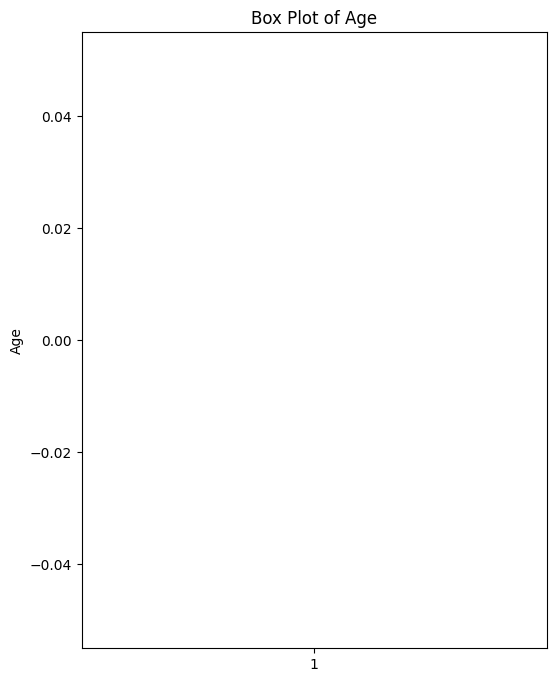

In [7]:
#1.2. Box Plot of Age
age_mapping = { "Under 18 years old": 16, "18-24 years old": 21, "25-34 years old": 29.5, "35-44 years old": 39.5, "45-54 years old": 49.5, "55-64 years old": 59.5, "65 years or older": 70 }
df["AgeNumeric"] = df["Age"].map(age_mapping)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

df.dropna(subset=["Age"], inplace=True)

plt.figure(figsize=(6, 8))
plt.boxplot(df["Age"], vert=True, patch_artist=True, boxprops=dict(facecolor="#1f77b4"))

plt.ylabel("Age")
plt.title("Box Plot of Age")

plt.show()

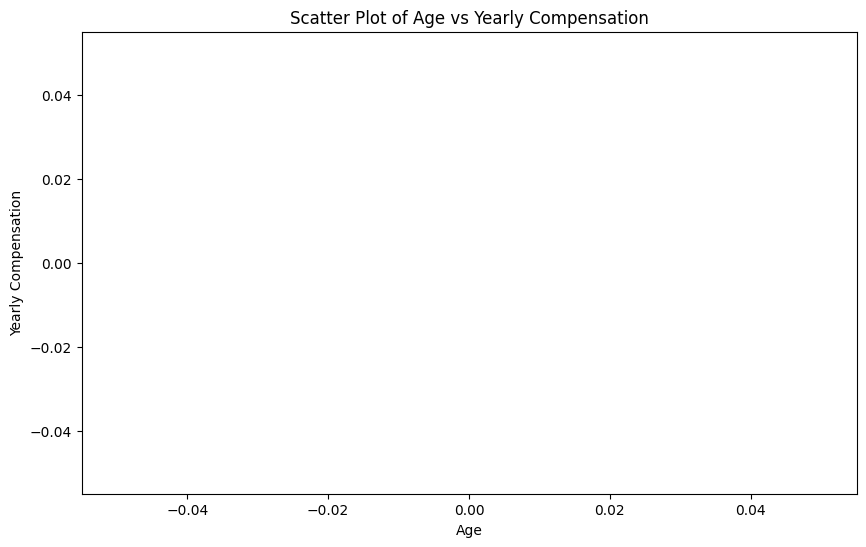

In [8]:
#2.1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`
def convert_age_category_to_numeric(age_category):
    if isinstance(age_category, str):
     
        age_range = age_category.split('-')
        if len(age_range) == 2:
            return (int(age_range[0]) + int(age_range[1])) / 2
        else:
            return int(age_range[0])  
    return age_category

df["Age_numeric"] = df["Age"].apply(convert_age_category_to_numeric)

df.dropna(subset=["Age_numeric", "ConvertedCompYearly"], inplace=True)

plt.figure(figsize=(10, 6))
plt.scatter(df["Age_numeric"], df["ConvertedCompYearly"], alpha=0.5, color='#1f77b4')

plt.xlabel("Age")
plt.ylabel("Yearly Compensation")
plt.title("Scatter Plot of Age vs Yearly Compensation")
plt.show()

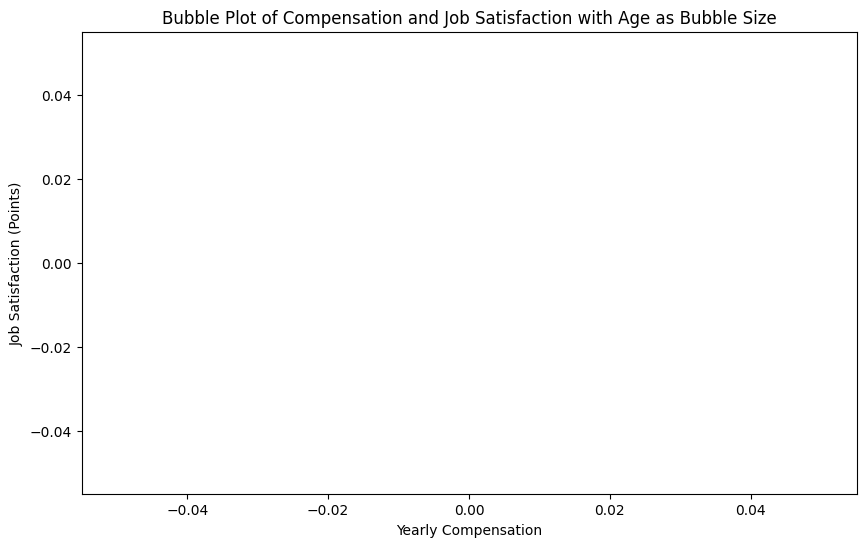

In [9]:
#2.2. Bubble Plot of ConvertedCompYearly and JobSatPoints_6 with Age_numeric as Bubble Size
def convert_age_category_to_numeric(age_category):
    if isinstance(age_category, str):

        age_range = age_category.split('-')
        if len(age_range) == 2:
            return (int(age_range[0]) + int(age_range[1])) / 2
        else:
            return int(age_range[0])  
    return age_category

df["Age_numeric"] = df["Age"].apply(convert_age_category_to_numeric)


df.dropna(subset=["ConvertedCompYearly", "JobSatPoints_6", "Age_numeric"], inplace=True)

plt.figure(figsize=(10, 6))
plt.scatter(
    df["ConvertedCompYearly"], 
    df["JobSatPoints_6"],  
    s=df["Age_numeric"] * 10,  
    alpha=0.5,  # Transparency of bubbles
    color='#1f77b4',  # Bubble color
)

plt.xlabel("Yearly Compensation")
plt.ylabel("Job Satisfaction (Points)")
plt.title("Bubble Plot of Compensation and Job Satisfaction with Age as Bubble Size")

plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

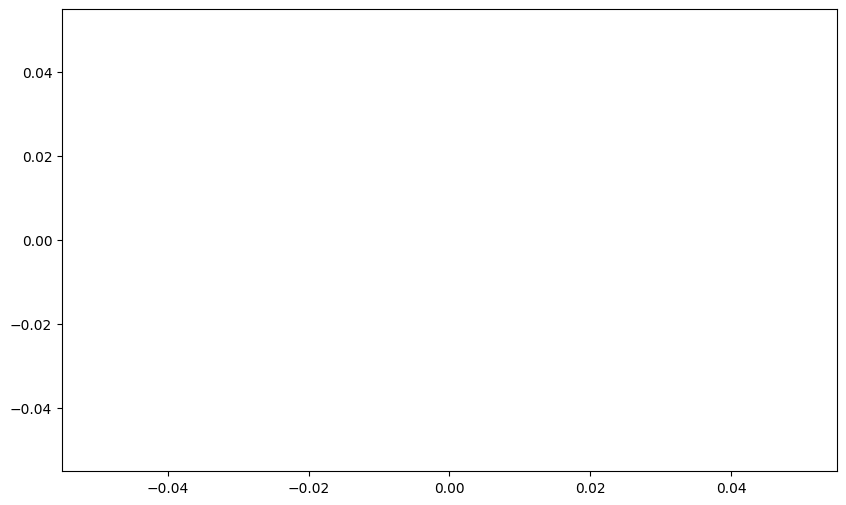

In [10]:
#3.1. Horizontal Bar Chart of MainBranch Distribution
role_counts = df["MainBranch"].value_counts()

plt.figure(figsize=(10, 6))
role_counts.plot(kind='barh', color='#1f77b4', edgecolor="black")

plt.xlabel("Number of Respondents")
plt.ylabel("Primary Role (MainBranch)")
plt.title("Distribution of Primary Roles (MainBranch)")

plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

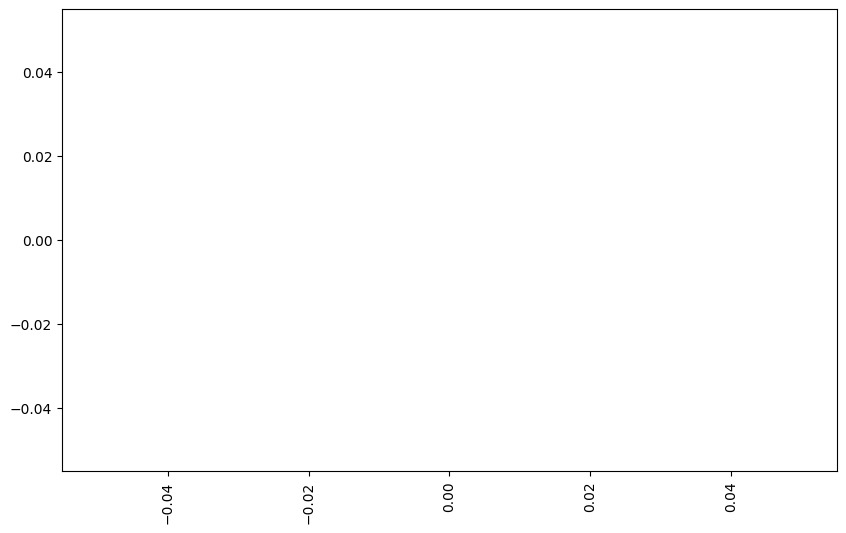

In [11]:
#3.2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With
language_counts = df["LanguageWantToWorkWith"].value_counts()

top_5_languages = language_counts.head(5)

plt.figure(figsize=(10, 6))
top_5_languages.plot(kind='bar', color='#1f77b4', edgecolor="black")

plt.xlabel("Programming Languages")
plt.ylabel("Number of Respondents")
plt.title("Top 5 Most Desired Programming Languages to Work With")

plt.show()


In [12]:
#3.3. Stacked Bar Chart of Median JobSatPoints_6 and JobSatPoints_7 by Age Group
def convert_age_category_to_numeric(age_category):
    if isinstance(age_category, str):
    
        age_range = age_category.split('-')
        if len(age_range) == 2:
            return (int(age_range[0]) + int(age_range[1])) / 2
        else:
            return int(age_range[0]) 
    return age_category


df["Age_numeric"] = df["Age"].apply(convert_age_category_to_numeric)


df.dropna(subset=["JobSatPoints_6", "JobSatPoints_7", "Age_numeric"], inplace=True)


bins = [0, 18, 30, 40, 50, 60, 100]  # Age groups
labels = ["18-30", "31-40", "41-50", "51-60", "60+"]
df["AgeGroup"] = pd.cut(df["Age_numeric"], bins=bins, labels=labels, right=False)


median_job_satisfaction = df.groupby("AgeGroup")[["JobSatPoints_6", "JobSatPoints_7"]].median()

median_job_satisfaction.plot(kind="bar", stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

plt.xlabel("Age Group")
plt.ylabel("Median Job Satisfaction")
plt.title("Median Job Satisfaction (JobSatPoints_6 and JobSatPoints_7) by Age Group")

plt.show()

ValueError: Bin labels must be one fewer than the number of bin edges

IndexError: index 0 is out of bounds for axis 0 with size 0

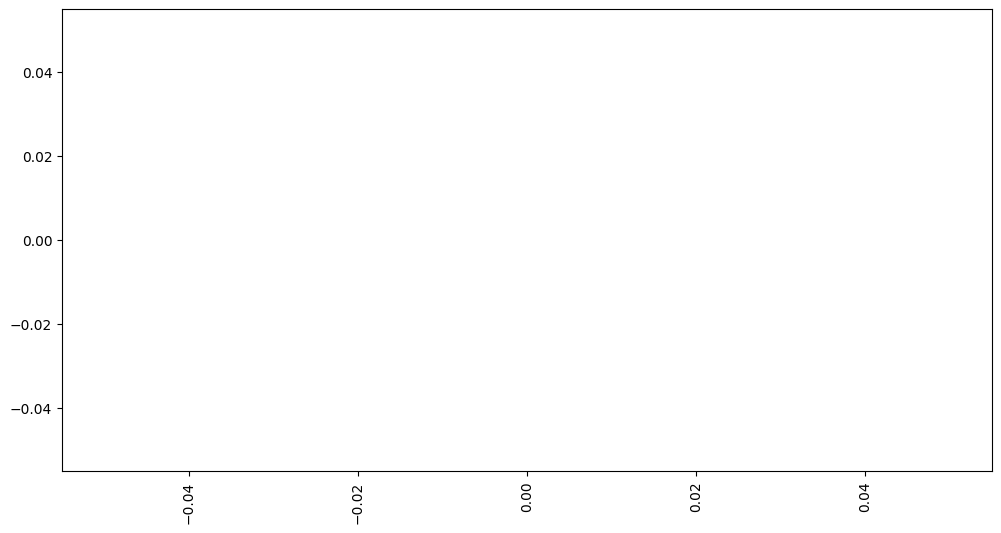

In [13]:
#3.4. Bar Chart of Database Popularity (DatabaseHaveWorkedWith)
database_counts = df["DatabaseHaveWorkedWith"].value_counts()

plt.figure(figsize=(12, 6))
database_counts.plot(kind='bar', color='#1f77b4', edgecolor="black")

plt.xlabel("Databases")
plt.ylabel("Number of Respondents")
plt.title("Database Popularity (Databases Respondents Have Worked With)")

plt.show()

In [14]:
#54.1. Grouped Bar Chart of Median ConvertedCompYearly for Different Age Groups
def convert_age_category_to_numeric(age_category):
    if isinstance(age_category, str):

        age_range = age_category.split('-')
        if len(age_range) == 2:
            return (int(age_range[0]) + int(age_range[1])) / 2
        else:
            return int(age_range[0])  
    return age_category

df["Age_numeric"] = df["Age"].apply(convert_age_category_to_numeric)


df.dropna(subset=["ConvertedCompYearly", "Age_numeric"], inplace=True)


bins = [0, 18, 30, 40, 50, 60, 100]  # Age groups
labels = ["18-30", "31-40", "41-50", "51-60", "60+"]
df["AgeGroup"] = pd.cut(df["Age_numeric"], bins=bins, labels=labels, right=False)


median_compensation = df.groupby("AgeGroup")["ConvertedCompYearly"].median()

plt.figure(figsize=(10, 6))
median_compensation.plot(kind='bar', color='#1f77b4', edgecolor="black")

plt.xlabel("Age Group")
plt.ylabel("Median Compensation (ConvertedCompYearly)")
plt.title("Median Compensation (ConvertedCompYearly) by Age Group")

plt.show()

ValueError: Bin labels must be one fewer than the number of bin edges

IndexError: index 0 is out of bounds for axis 0 with size 0

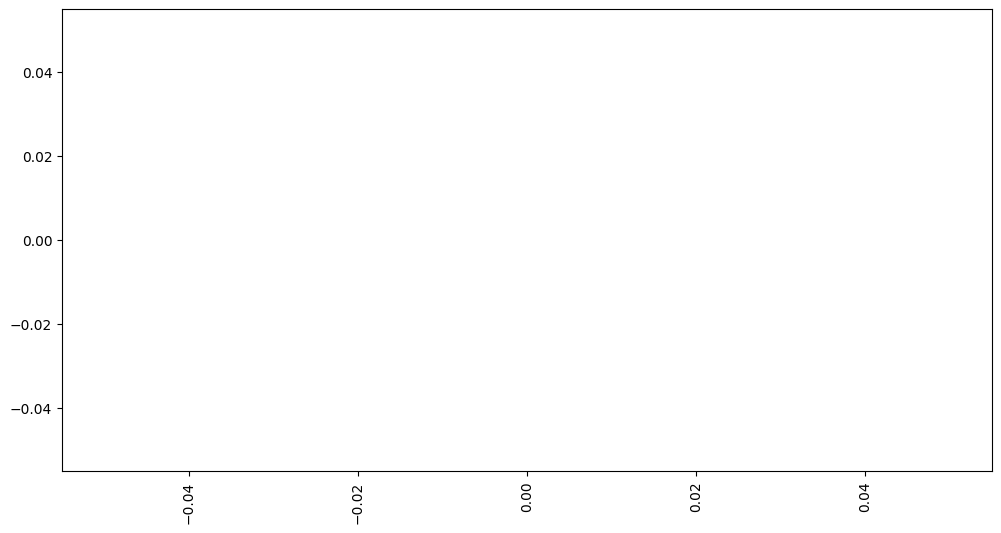

In [15]:
#4.2. Bar Chart of Respondent Count by Country
country_counts = df["Country"].value_counts()


plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='#1f77b4', edgecolor="black")

plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Respondents by Country")

plt.show()